Загрузка данных

In [1]:
from sklearn.datasets import fetch_openml

# Загрузка данных MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Ограничиваемся первыми 2,000 изображений
X = X[:2000]
y = y[:2000]

Предобработка данных

In [27]:
from sklearn.model_selection import train_test_split

# Нормализация данных
X = X / 255.0

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Реализация KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание модели KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Обучение модели
knn_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_knn = knn_model.predict(X_test)

# Оценка точности
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Точность KNN: {accuracy_knn * 100:.2f}%")

Точность KNN: 88.00%


Релизация SVM

In [29]:
from sklearn.svm import SVC

# Создание модели SVM
svm_model = SVC()

# Обучение модели
svm_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_svm = svm_model.predict(X_test)

# Оценка точности
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Точность SVM: {accuracy_svm * 100:.2f}%")

Точность SVM: 92.00%


Результаты

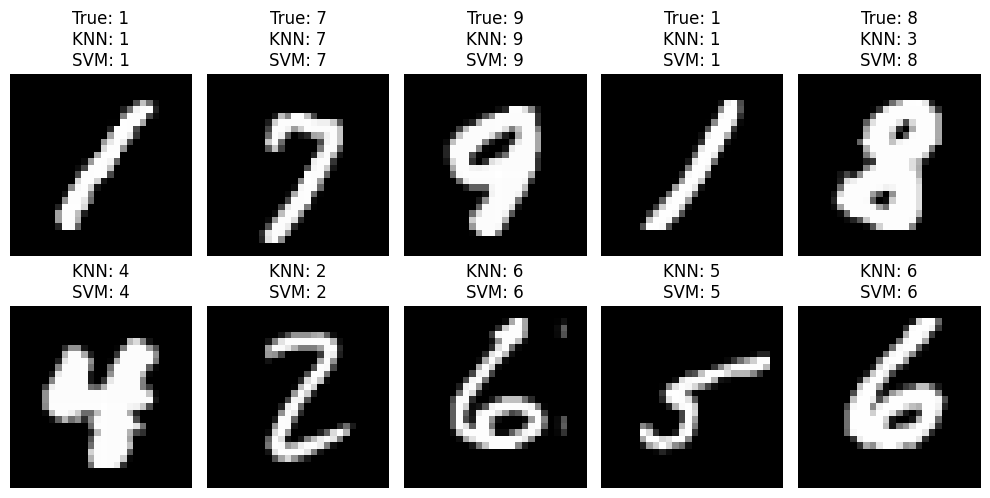

In [31]:
import matplotlib.pyplot as plt

# Визуализация нескольких изображений
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test.to_numpy()[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test.values[i]}\nKNN: {y_pred_knn[i]}\nSVM: {y_pred_svm[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()